In [ ]:
!mkdir ../checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P ../checkpoints

In [1]:
import torch
import matplotlib.pyplot as plt
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot

/home/andrew/miniconda3/envs/ia4mk/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config_file = '../configs/mask2former/mask2former_r50_8xb2-90k_apolloscape.py'
checkpoint_file = '../work_dirs/m2f_AS/best_mIoU_iter_90000.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cuda')

Loads checkpoint by local backend from path: ../work_dirs/m2f_AS/best_mIoU_iter_90000.pth


In [5]:
# test a single image
import os
imgs_path = '../data/test_images'
img_list = os.listdir(imgs_path)
img = os.path.join(imgs_path, img_list[0])
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)
result = inference_model(model, img)

/home/andrew/miniconda3/envs/ia4mk/lib/python3.8/site-packages/mmdet/models/layers/positional_encoding.py:103: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature**(2 * (dim_t // 2) / self.num_feats)
/home/andrew/miniconda3/envs/ia4mk/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


(2710, 3384, 3)


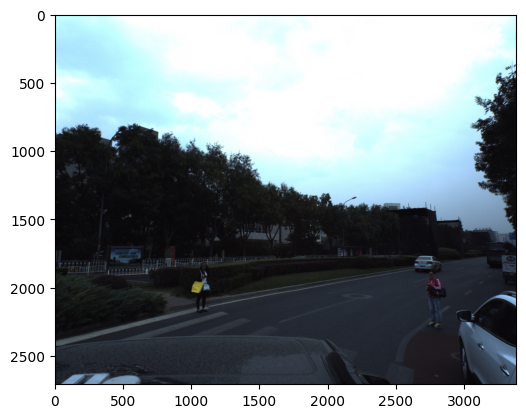

In [16]:
# show the results
vis_result = show_result_pyplot(model, img, result, show=True)
print(vis_result.shape)
plt.imshow(vis_result)